<a href="https://colab.research.google.com/github/yoshinodev/Movies_Data_Analysis/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final**

## FASE 1 ***

## Google drive

In [ ]:
# Access google drive to upload dataset
from google.colab import drive
drive.mount('/content/drive')

#https://saturncloud.io/blog/how-to-read-csv-to-dataframe-in-google-colab/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libs

In [ ]:
 # Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast

## Upload and read dataset

In [ ]:
# # Upload and read dataset, now stored in variable movies
movies = pd.read_csv('/content/drive/MyDrive/10811_Final_Project/dataset/movies_metadata.csv',
                     usecols=["id", "belongs_to_collection", "budget", "genres", "original_title", "production_companies", "release_date", "revenue", "runtime", "title"],
                     encoding='utf-8', low_memory=False)

In [ ]:
# Upload and read dataset, now stored in variable movies
# movies = pd.read_csv('datasets/movies_metadata.csv',
#                      usecols=["id", "belongs_to_collection", "budget", "genres", "original_title", "production_companies", "release_date", "revenue", "runtime", "title"],
#                      encoding='utf-8', low_memory=False)

## Summary of dataset in analysis

In [ ]:
# movies.info() will show a concise summary of the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 45466 non-null  object 
 2   genres                 45466 non-null  object 
 3   id                     45466 non-null  object 
 4   original_title         45466 non-null  object 
 5   production_companies   45463 non-null  object 
 6   release_date           45379 non-null  object 
 7   revenue                45460 non-null  float64
 8   runtime                45203 non-null  float64
 9   title                  45460 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.5+ MB


## Dataset headings and first 5 rows

In [ ]:
# method head used to quickly check the data's structure
movies.head

<bound method NDFrame.head of                                    belongs_to_collection    budget  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                    NaN  65000000   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                    NaN  16000000   
4      {'id': 96871, 'name': 'Father of the Bride Col...         0   
...                                                  ...       ...   
45461                                                NaN         0   
45462                                                NaN         0   
45463                                                NaN         0   
45464                                                NaN         0   
45465                                                NaN         0   

                                                  genres      id  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     

## Check how many null values are

In [ ]:
movies.isnull().sum()

belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_title               0
production_companies         3
release_date                87
revenue                      6
runtime                    263
title                        6
dtype: int64

In [ ]:
# check if the column belongs_to_collection has null values and replace them with None
# movies['belongs_to_collection'].isnull().sum()
# movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna('None')

# # check if the column production_companies has null values and replace them with None
# movies['production_companies'].isnull().sum()
# movies['production_companies'] = movies['production_companies'].fillna('None')

# # check if the column genres has null values and replace them with None
# movies['genres'].isnull().sum()
# movies['genres'] = movies['genres'].fillna('None')

## Check the data types from the dataset

In [ ]:
movies.dtypes

belongs_to_collection     object
budget                    object
genres                    object
id                        object
original_title            object
production_companies      object
release_date              object
revenue                  float64
runtime                  float64
title                     object
dtype: object

## Check if there's any duplicates

In [ ]:
# Show the sum of how many duplicates are
movies.duplicated().sum()

30

## Remove duplicates

In [ ]:
movies = movies.drop_duplicates()

In [ ]:
movies.shape

(45436, 10)

## Cleaning genres column


---

Genres column had empty arrays [] on the rows

In [ ]:
# drop the values that have both [] in the genres column and 0 revenue
movies = movies.drop(movies[(movies['genres'] == '[]') & (movies['revenue'] == 0)].index)
# replace the [] in the genres column with 0 for better visibility (0 = no genres associated)
movies['genres'] = movies['genres'].replace('[]', 0)
# check if there's any value left with [] in the genres column
movies[movies['genres'] == '[]']


,belongs_to_collection,budget,genres,id,original_title,production_companies,release_date,revenue,runtime,title


## Cleaning production_companies

---

production_companies column had empty arrays [] on the rows

In [ ]:
# replace the [] in the production_companies column with 0 for better visibility (0 = no production_companies associated)
movies['production_companies'] = movies['production_companies'].replace('[]', 0)
# check if there's any value left with [] in the prodyction_companies column
movies[movies['production_companies'] == '[]']

,belongs_to_collection,budget,genres,id,original_title,production_companies,release_date,revenue,runtime,title


## Checking if belongs_to_collection has any empty list either {} or []

In [ ]:
# check if there's either [] or {} value in "belongs_to_collection" column
movies[movies['belongs_to_collection'] == '[]']
movies[movies['belongs_to_collection'] == '{}']

,belongs_to_collection,budget,genres,id,original_title,production_companies,release_date,revenue,runtime,title


## Check dataset after initial cleaning

In [ ]:
movies.shape

(43017, 10)

In [ ]:
# replace empty values from the column budget with 0
movies['budget'] = movies['budget'].replace(0, np.nan)

## Convert data types for budget (object to float64), id (object to int) and release_date (object to *datetime*)

In [ ]:
# drop any row that doesn't contain only numbers in the budget column *******************************
movies = movies.drop(movies[~movies['budget'].str.isnumeric()].index)
# convert budget from string to float
movies['budget'] = movies['budget'].astype(float)
# convert id from object to int
movies['id'] = movies['id'].astype(int)
# convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies.dtypes

belongs_to_collection            object
budget                          float64
genres                           object
id                                int64
original_title                   object
production_companies             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
title                            object
dtype: object

## Rename the column id to movieId for better readability

In [ ]:
movies = movies.rename(columns={"id":"movieId"})

## Check all the columns so far

In [ ]:
movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'movieId',
       'original_title', 'production_companies', 'release_date', 'revenue',
       'runtime', 'title'],
      dtype='object')

NOTE: The columns 'genres', belongs_to_collection and production_companies appears to contain strings that look like dictionary representations, but they are stored as strings. For example, a typical string representation of a dictionary in Python looks like {'key': 'value'}.

So for instance in the belongs_to_collection:

String Representation:

Original Data: '{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}'
This data looks like a dictionary, but it's stored as a string.
Conversion using ast.literal_eval:

The ast.literal_eval function is a safe way to evaluate a string containing a Python literal or container display. It interprets the string as a literal and returns the corresponding Python object.
For example, ast.literal_eval("{'key': 'value'}") would return a dictionary object {'key': 'value'}.
Extracting 'name' Value:

After converting the string to a dictionary, the code then extracts the value associated with the 'name' key. For instance, {'id': 10194, 'name': 'Toy Story Collection'} would be transformed into the string 'Toy Story Collection'.
In summary, the process involves taking a string that looks like a dictionary, using ast.literal_eval to convert it into an actual dictionary, and then extracting specific values from that dictionary. This is a safe way to handle string representations of data structures in Python.

## Extract the values from "name" in each row from the column "genres"

In [ ]:
import ast

# def clean_genres(x): Defines a function clean_genres that takes an input x.
def clean_genres(x):
    """ Checks if x is a string and not NaN.
        It uses isinstance to ensure that x is a string, and pd.notna checks if it's not NaN."""
    if isinstance(x, str) and pd.notna(x):
        """ This line is a list comprehension that processes the 'genres' column.
         It uses ast.literal_eval to safely evaluate the string representation of a list of dictionaries,
         replaces single quotes with double quotes to make it compatible with JSON format,
         and extracts the 'name' values after stripping leading and trailing whitespaces."""
        return [genre['name'].strip() for genre in ast.literal_eval(str(x).replace("'", "\""))]
    else:
        # Returns an empty list if x is not a valid string.
        return []

""" This line applies the clean_genres function to each element in the 'genres' column using the apply method,
creating a new column named 'cleaned_genres' in the DataFrame. """

movies['cleaned_genres'] = movies['genres'].apply(clean_genres)

# Assigns the values of 'cleaned_genres' to the 'genres' column, effectively replacing it.
movies['genres'] = movies['cleaned_genres']

# Removes the temporary 'cleaned_genres' column from the DataFrame.
movies.drop('cleaned_genres', axis=1, inplace=True)

# Display the updated DataFrame
movies['genres']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45459               [Science Fiction]
45460        [Drama, Action, Romance]
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
Name: genres, Length: 43014, dtype: object

## Extract each "name" value for each row in the column "belongs_to_collection" and separated only by commas

In [ ]:
# This function takes an input x, evaluates the 'belongs_to_collection' string into a dictionary,
# and returns the 'name' value. If the input is NaN, it returns an empty string.
def extract_collection_name(x):
    if pd.notna(x):
        return ast.literal_eval(str(x))['name']
    else:
        return ''

# Apply the function to create a new column 'collection_name'
movies['collection_name'] = movies['belongs_to_collection'].apply(extract_collection_name)

# Replace 'belongs_to_collection' with 'collection_name'
movies['belongs_to_collection'] = movies['collection_name']

# Drop the temporary 'collection_name' column
movies.drop('collection_name', axis=1, inplace=True)

# Display the result
movies[['belongs_to_collection']]

,belongs_to_collection
0,Toy Story Collection
1,
2,Grumpy Old Men Collection
3,
4,Father of the Bride Collection
...,...
45459,
45460,
45461,
45462,


## Extracting only the names in each row from the column 'production_companies'


---
1.1 - show comparison

1.2 - replace old column for the new one with only the names extracted


In [ ]:
""" Handling Mixed types of data with a function inclunding a try except:
The try block attempts to execute the list comprehension to extract 'name' values
from the evaluated string representation of a list of dictionaries (ast.literal_eval(str(x))).
The except (ValueError, TypeError) block catches errors of type ValueError or TypeError that may occur during the evaluation.
These errors could happen if the content of 'production_companies' is not a valid string representation of a list of dictionaries.
"""
def extract_production_companies_names(x):
    if pd.notna(x):
        try:
            return [company['name'] for company in ast.literal_eval(str(x))]
        except (ValueError, TypeError):
            return []
    else:
        """
        If an error is encountered during the evaluation, the function returns an empty list.
        This ensures that if the content of 'production_companies' is not in the expected format,
         the result will be an empty list instead of causing an error.
        """
        return []
# Apply the function to create a new column 'production_company_names'
movies['production_companies_names'] = movies['production_companies'].apply(extract_production_companies_names)

# Display the result comparison
movies[['production_companies', 'production_companies_names']]


,production_companies,production_companies_names
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",[Pixar Animation Studios]
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[TriStar Pictures, Teitler Film, Interscope Co..."
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[Warner Bros., Lancaster Gate]"
3,[{'name': 'Twentieth Century Fox Film Corporat...,[Twentieth Century Fox Film Corporation]
4,"[{'name': 'Sandollar Productions', 'id': 5842}...","[Sandollar Productions, Touchstone Pictures]"
...,...,...
45459,"[{'name': 'Concorde-New Horizons', 'id': 4688}]",[Concorde-New Horizons]
45460,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[Westdeutscher Rundfunk (WDR), Working Title F..."
45461,0,[]
45462,"[{'name': 'Sine Olivia', 'id': 19653}]",[Sine Olivia]


In [ ]:
# Assign values from the new column to the original 'production_companies' column
movies['production_companies'] = movies['production_companies_names']
# Drop the old  column which is now called production_companies_names
movies.drop('production_companies', axis=1, inplace=True)
movies

,belongs_to_collection,budget,genres,movieId,original_title,release_date,revenue,runtime,title,production_companies_names
0,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862,Toy Story,1995-10-30,373554033.0,81.0,Toy Story,[Pixar Animation Studios]
1,,65000000.0,"[Adventure, Fantasy, Family]",8844,Jumanji,1995-12-15,262797249.0,104.0,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602,Grumpier Old Men,1995-12-22,0.0,101.0,Grumpier Old Men,"[Warner Bros., Lancaster Gate]"
3,,16000000.0,"[Comedy, Drama, Romance]",31357,Waiting to Exhale,1995-12-22,81452156.0,127.0,Waiting to Exhale,[Twentieth Century Fox Film Corporation]
4,Father of the Bride Collection,0.0,[Comedy],11862,Father of the Bride Part II,1995-02-10,76578911.0,106.0,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]"
...,...,...,...,...,...,...,...,...,...,...
45459,,0.0,[Science Fiction],222848,Caged Heat 3000,1995-01-01,0.0,85.0,Caged Heat 3000,[Concorde-New Horizons]
45460,,0.0,"[Drama, Action, Romance]",30840,Robin Hood,1991-05-13,0.0,104.0,Robin Hood,"[Westdeutscher Rundfunk (WDR), Working Title F..."
45461,,0.0,"[Drama, Family]",439050,رگ خواب,NaT,0.0,90.0,Subdue,[]
45462,,0.0,[Drama],111109,Siglo ng Pagluluwal,2011-11-17,0.0,360.0,Century of Birthing,[Sine Olivia]


## quickly review how the dataframe structure is so far and set movieId as the index

In [ ]:
# assign movieId as the index of the dataset and sort the index in ascending order
movies = movies.set_index('movieId').sort_index()

movies

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names
movieId,,,,,,,,,
2,,0.0,"[Drama, Crime]",Ariel,1988-10-21,0.0,69.0,Ariel,"[Villealfa Filmproduction Oy, Finnish Film Fou..."
3,,0.0,"[Drama, Comedy]",Varjoja paratiisissa,1986-10-16,0.0,76.0,Shadows in Paradise,[Villealfa Filmproduction Oy]
5,,4000000.0,"[Crime, Comedy]",Four Rooms,1995-12-09,4300000.0,98.0,Four Rooms,"[Miramax Films, A Band Apart]"
6,,0.0,"[Action, Thriller, Crime]",Judgment Night,1993-10-15,12136938.0,110.0,Judgment Night,"[Universal Pictures, Largo Entertainment, JVC ..."
11,Star Wars Collection,11000000.0,"[Adventure, Action, Science Fiction]",Star Wars,1977-05-25,775398007.0,121.0,Star Wars,"[Lucasfilm, Twentieth Century Fox Film Corpora..."
...,...,...,...,...,...,...,...,...,...
465044,,0.0,"[Fantasy, Drama]",Abduction,2017-06-28,0.0,90.0,Abduction,[]
467731,,0.0,[Drama],Tragedy in a Temporary Town,1956-02-19,0.0,60.0,Tragedy in a Temporary Town,[]
468343,,0.0,"[Drama, Romance]",Silja - nuorena nukkunut,1956-01-01,0.0,87.0,Silja - nuorena nukkunut,[]


## Check the rows from the column production_companies_names that have empty lists and replace them for None

In [ ]:
""" check if there are empty lists in production_companies_names column
replace the empty lists with the word None """
def replace_empty_lists(row):
    if len(row) == 0:
        return "None"
    else:
        return row

movies["production_companies_names"] = movies["production_companies_names"].apply(replace_empty_lists)

movies

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names
movieId,,,,,,,,,
2,,0.0,"[Drama, Crime]",Ariel,1988-10-21,0.0,69.0,Ariel,"[Villealfa Filmproduction Oy, Finnish Film Fou..."
3,,0.0,"[Drama, Comedy]",Varjoja paratiisissa,1986-10-16,0.0,76.0,Shadows in Paradise,[Villealfa Filmproduction Oy]
5,,4000000.0,"[Crime, Comedy]",Four Rooms,1995-12-09,4300000.0,98.0,Four Rooms,"[Miramax Films, A Band Apart]"
6,,0.0,"[Action, Thriller, Crime]",Judgment Night,1993-10-15,12136938.0,110.0,Judgment Night,"[Universal Pictures, Largo Entertainment, JVC ..."
11,Star Wars Collection,11000000.0,"[Adventure, Action, Science Fiction]",Star Wars,1977-05-25,775398007.0,121.0,Star Wars,"[Lucasfilm, Twentieth Century Fox Film Corpora..."
...,...,...,...,...,...,...,...,...,...
465044,,0.0,"[Fantasy, Drama]",Abduction,2017-06-28,0.0,90.0,Abduction,None
467731,,0.0,[Drama],Tragedy in a Temporary Town,1956-02-19,0.0,60.0,Tragedy in a Temporary Town,None
468343,,0.0,"[Drama, Romance]",Silja - nuorena nukkunut,1956-01-01,0.0,87.0,Silja - nuorena nukkunut,None


## Check if the genres column has any empty list since the production_companies_names had

In [ ]:
# check if the genres column has any empty list
movies[movies["genres"].str.len() == 0]
# replace the empty lists with the word None
movies["genres"] = movies["genres"].apply(replace_empty_lists)

## Check if there's any empty value in the runtime column

In [ ]:
movies[movies['runtime'] == '']

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names
movieId,,,,,,,,,


## Check if there are any rows from the dataset that has 0 value in runtime AND 0 in the revenue column AND also in the budget column


*   If the runtime is 0 AND both the revenue and the budget are 0, they will not bring any value for the analysis we want to make
*   These data should be removed **ask teacher**



In [ ]:
# check if there are any rows that have 0 in the runtime column AND also 0 in the revenue column AND also 0 in the budget column
movies[(movies['runtime'] == 0) & (movies['revenue'] == 0) & (movies['budget'] == 0)]
# drop the rows that have 0 in the runtime column AND also 0 in the revenue column AND also 0 in the budget column
movies = movies.drop(movies[(movies['runtime'] == 0) & (movies['revenue'] == 0) & (movies['budget'] == 0)].index)


## Remove null values

In [ ]:
# Remove null values from the dataset with the method dropna()
movies = movies.dropna()

## Check if the nulls were correctly removed from the dataset

In [ ]:
movies.isnull().sum()

belongs_to_collection         0
budget                        0
genres                        0
original_title                0
release_date                  0
revenue                       0
runtime                       0
title                         0
production_companies_names    0
dtype: int64

## Check if all the data types are correctly

In [ ]:
movies.dtypes

belongs_to_collection                 object
budget                               float64
genres                                object
original_title                        object
release_date                  datetime64[ns]
revenue                              float64
runtime                              float64
title                                 object
production_companies_names            object
dtype: object

## FASE 2 - Estatística descritiva

to write

In [ ]:
# check the top 10 movies with the highest revenue
top10_revenue = movies.nlargest(10, ['revenue']).sort_values(by='revenue', ascending=False)
top10_revenue

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names
movieId,,,,,,,,,
19995,Avatar Collection,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,2009-12-10,2.787965e+09,162.0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo..."
140607,Star Wars Collection,245000000.0,"[Action, Adventure, Science Fiction, Fantasy]",Star Wars: The Force Awakens,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,"[Lucasfilm, Truenorth Productions, Bad Robot]"
597,,200000000.0,"[Drama, Romance, Thriller]",Titanic,1997-11-18,1.845034e+09,194.0,Titanic,"[Paramount Pictures, Twentieth Century Fox Fil..."
24428,The Avengers Collection,220000000.0,"[Science Fiction, Action, Adventure]",The Avengers,2012-04-25,1.519558e+09,143.0,The Avengers,"[Paramount Pictures, Marvel Studios]"
135397,Jurassic Park Collection,150000000.0,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,2015-06-09,1.513529e+09,124.0,Jurassic World,"[Universal Studios, Amblin Entertainment, Lege..."
168259,The Fast and the Furious Collection,190000000.0,[Action],Furious 7,2015-04-01,1.506249e+09,137.0,Furious 7,"[Universal Pictures, Original Film, Fuji Telev..."
99861,The Avengers Collection,280000000.0,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S..."
12445,Harry Potter Collection,125000000.0,"[Family, Fantasy, Adventure]",Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1.342000e+09,130.0,Harry Potter and the Deathly Hallows: Part 2,"[Warner Bros., Heyday Films]"
109445,Frozen Collection,150000000.0,"[Animation, Adventure, Family]",Frozen,2013-11-27,1.274219e+09,102.0,Frozen,"[Walt Disney Pictures, Walt Disney Animation S..."


grafico

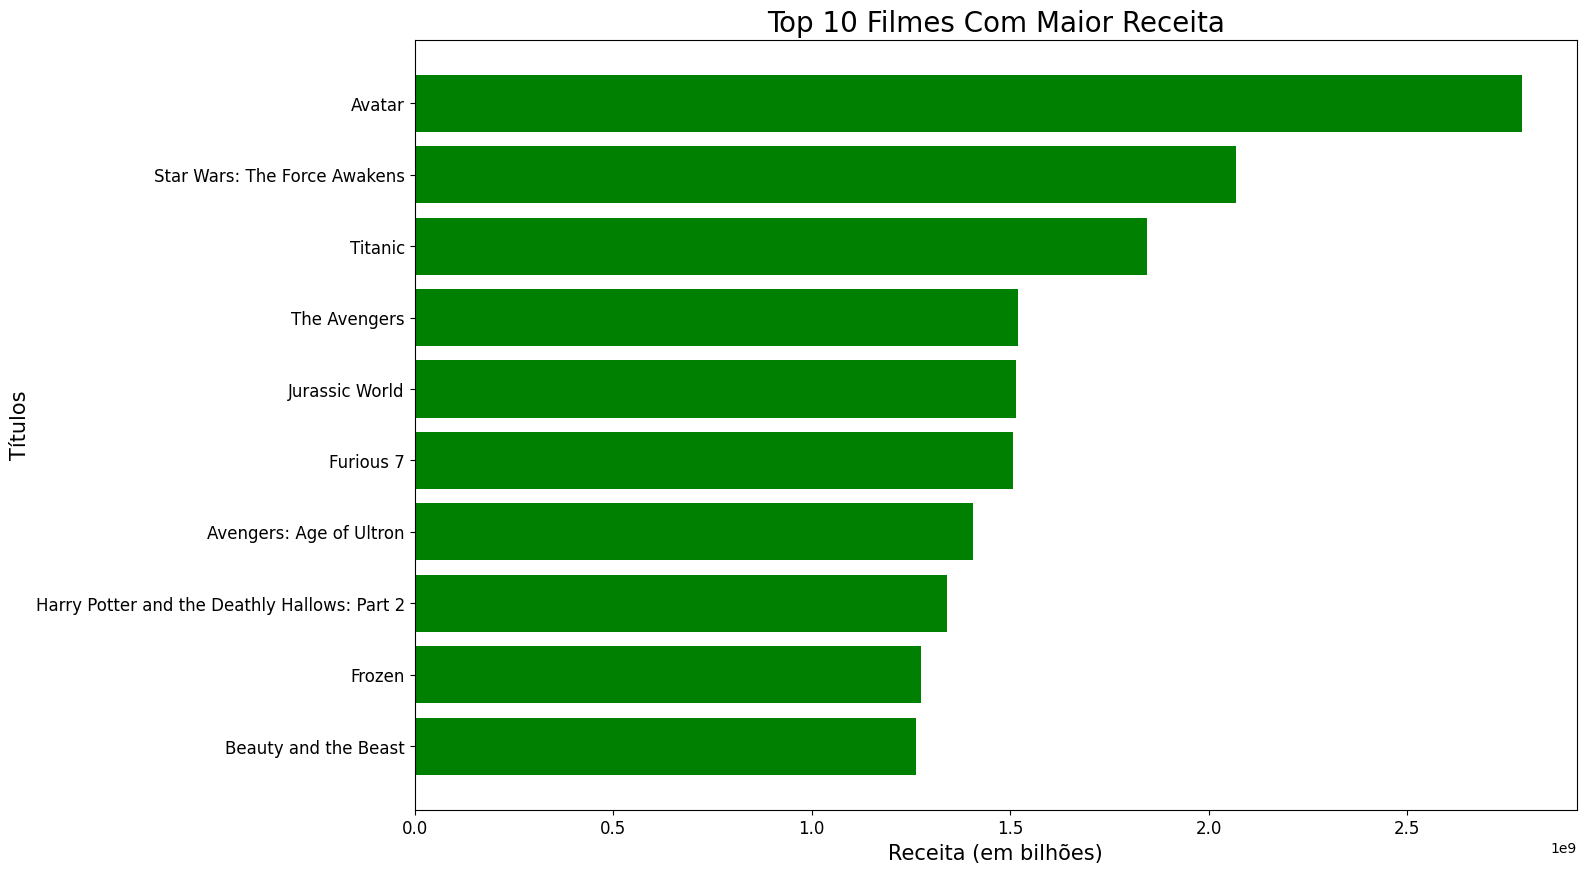

In [ ]:
# show a graph with the top 10 movies with the highest revenue and their title in descending order
plt.figure(figsize=(15, 10))
plt.barh(top10_revenue['title'], top10_revenue['revenue'], color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Filmes Com Maior Receita', fontsize=20)
plt.xlabel('Receita (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

to write

In [ ]:
# check the top 10 movies with the highest budget
top10_budget = movies.nlargest(10, ['budget']).sort_values(by='budget', ascending=False)
top10_budget

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names
movieId,,,,,,,,,
1865,Pirates of the Caribbean Collection,380000000.0,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,2011-05-14,1.045714e+09,136.0,Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
285,Pirates of the Caribbean Collection,300000000.0,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films..."
99861,The Avengers Collection,280000000.0,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S..."
1452,Superman Collection,270000000.0,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,2006-06-28,3.910812e+08,154.0,Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ..."
38757,Tangled Collection,260000000.0,"[Animation, Family]",Tangled,2010-11-24,5.917949e+08,100.0,Tangled,"[Walt Disney Pictures, Walt Disney Animation S..."
49529,,260000000.0,"[Action, Adventure, Science Fiction]",John Carter,2012-03-07,2.841391e+08,132.0,John Carter,[Walt Disney Pictures]
335988,Transformers Collection,260000000.0,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,2017-06-21,6.049421e+08,149.0,Transformers: The Last Knight,"[Paramount Pictures, Di Bonaventura Pictures, ..."
559,Spider-Man Collection,258000000.0,"[Fantasy, Action, Adventure]",Spider-Man 3,2007-05-01,8.908716e+08,139.0,Spider-Man 3,"[Columbia Pictures, Laura Ziskin Productions, ..."
57201,,255000000.0,"[Action, Adventure, Western]",The Lone Ranger,2013-07-03,8.928991e+07,149.0,The Lone Ranger,"[Walt Disney Pictures, Jerry Bruckheimer Films..."


grafico*

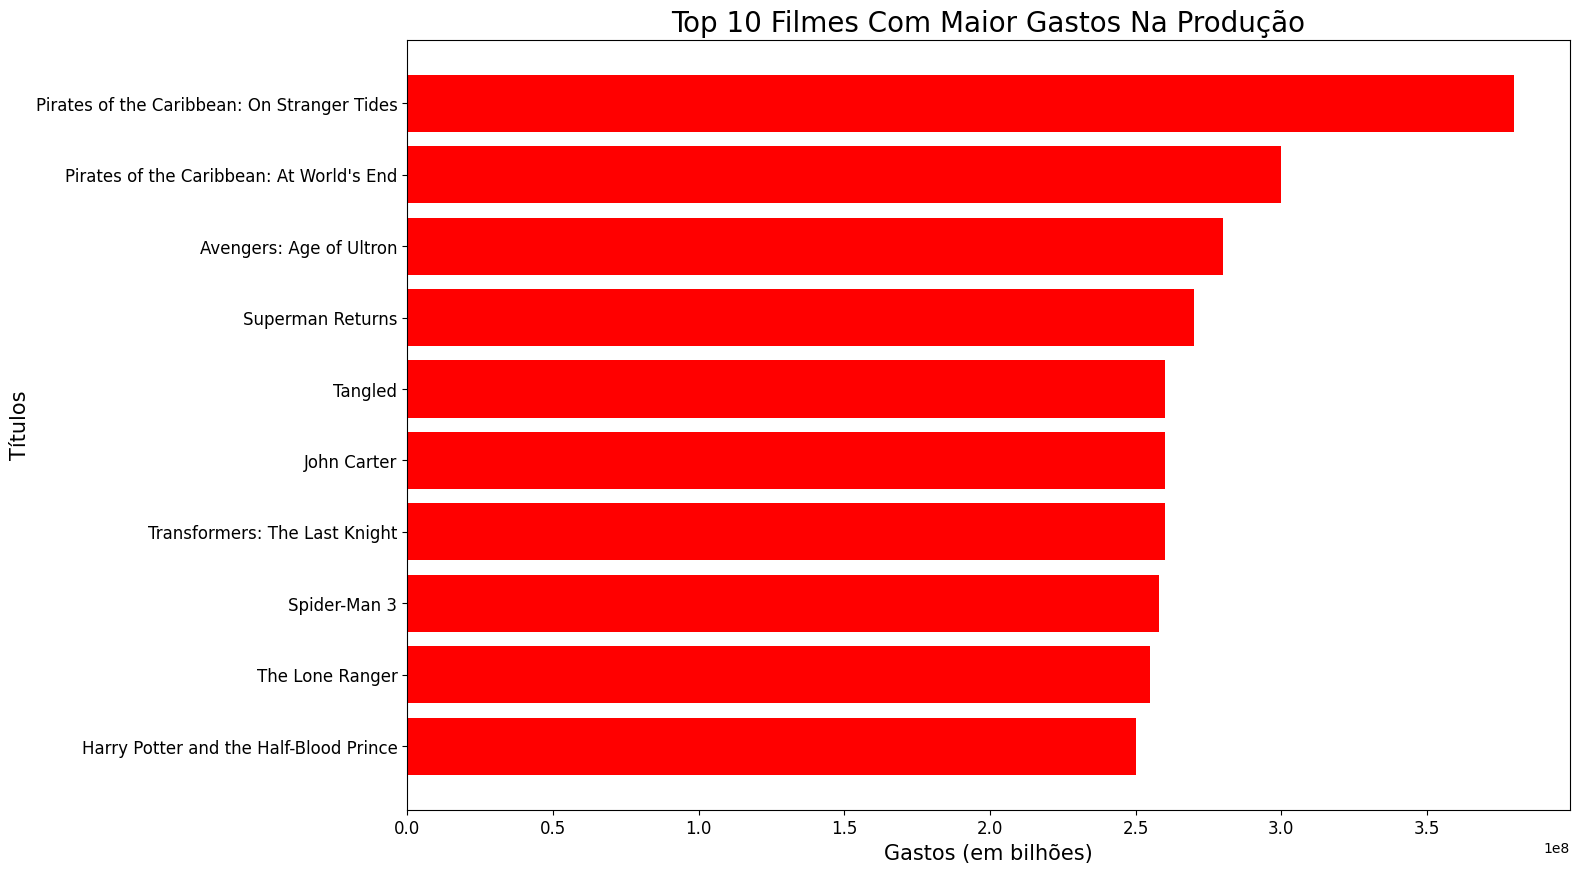

In [ ]:
# show a graph with the top 10 movies with the highest budget and their title in descending order
plt.figure(figsize=(15, 10))
plt.barh(top10_budget['title'], top10_budget['budget'], color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 Filmes Com Maior Gastos Na Produção', fontsize=20)
plt.xlabel('Gastos (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

* to write

In [ ]:
# create a new column called profit that is the difference between revenue and budget
movies['profit'] = movies['revenue'] - movies['budget']
# check the top 10 movies with the highest profit
top10_profit = movies.nlargest(10, ['profit']).sort_values(by='profit', ascending=False)
top10_profit

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names,profit
movieId,,,,,,,,,,
19995,Avatar Collection,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,2009-12-10,2.787965e+09,162.0,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...",2.550965e+09
140607,Star Wars Collection,245000000.0,"[Action, Adventure, Science Fiction, Fantasy]",Star Wars: The Force Awakens,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,"[Lucasfilm, Truenorth Productions, Bad Robot]",1.823224e+09
597,,200000000.0,"[Drama, Romance, Thriller]",Titanic,1997-11-18,1.845034e+09,194.0,Titanic,"[Paramount Pictures, Twentieth Century Fox Fil...",1.645034e+09
135397,Jurassic Park Collection,150000000.0,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,2015-06-09,1.513529e+09,124.0,Jurassic World,"[Universal Studios, Amblin Entertainment, Lege...",1.363529e+09
168259,The Fast and the Furious Collection,190000000.0,[Action],Furious 7,2015-04-01,1.506249e+09,137.0,Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",1.316249e+09
24428,The Avengers Collection,220000000.0,"[Science Fiction, Action, Adventure]",The Avengers,2012-04-25,1.519558e+09,143.0,The Avengers,"[Paramount Pictures, Marvel Studios]",1.299558e+09
12445,Harry Potter Collection,125000000.0,"[Family, Fantasy, Adventure]",Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1.342000e+09,130.0,Harry Potter and the Deathly Hallows: Part 2,"[Warner Bros., Heyday Films]",1.217000e+09
99861,The Avengers Collection,280000000.0,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",1.125404e+09
109445,Frozen Collection,150000000.0,"[Animation, Adventure, Family]",Frozen,2013-11-27,1.274219e+09,102.0,Frozen,"[Walt Disney Pictures, Walt Disney Animation S...",1.124219e+09


* to write

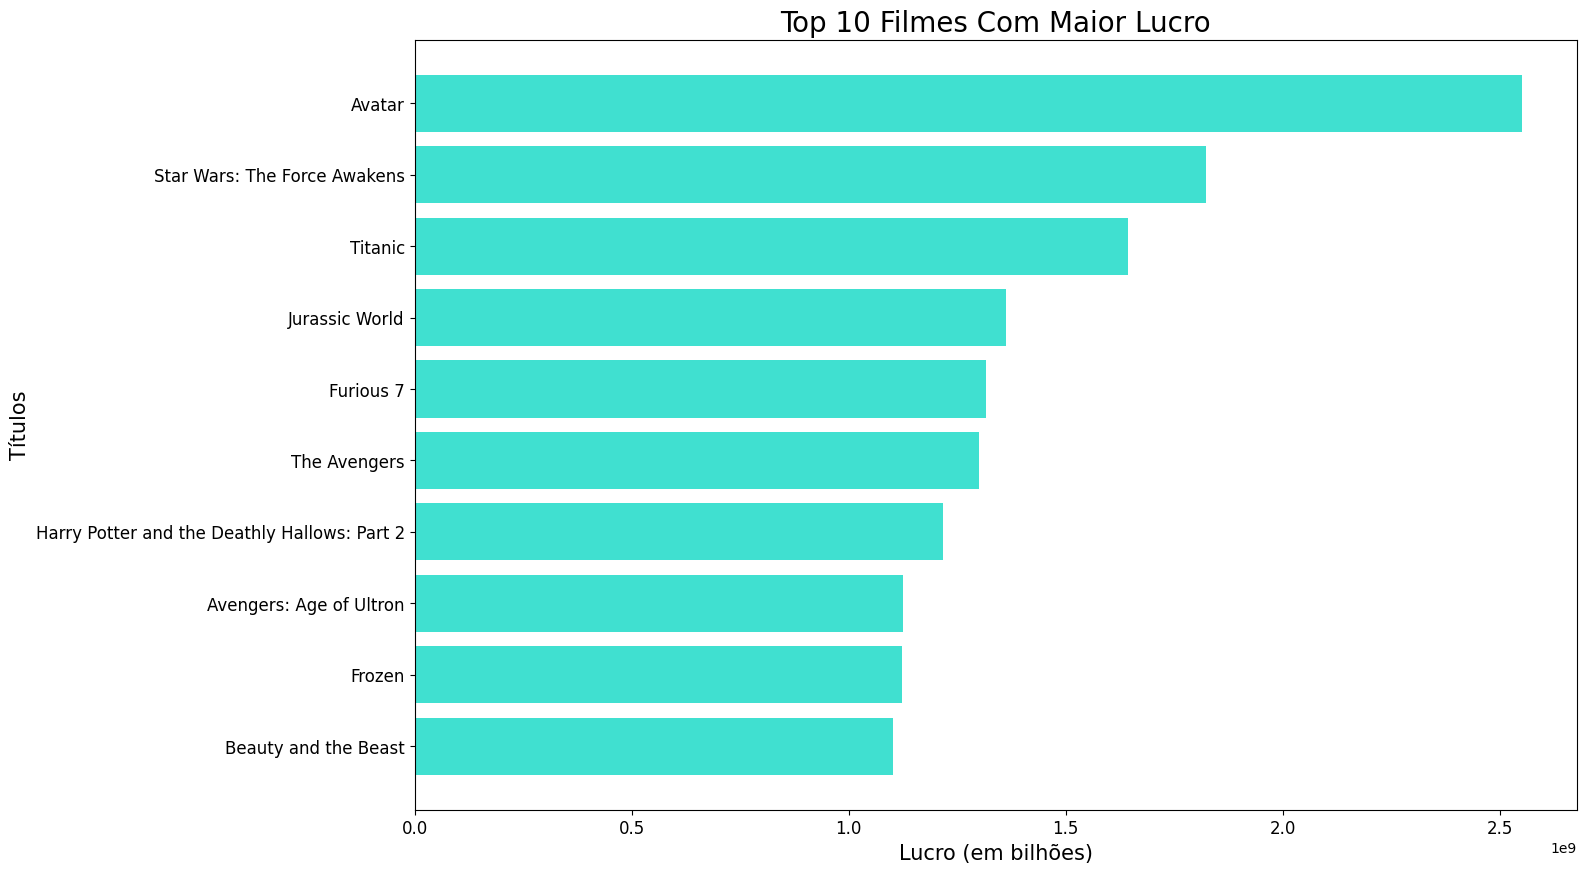

In [ ]:
# show a graph with the top 10 movies with the highest profit and their title in descending order
plt.figure(figsize=(15, 10))
plt.barh(top10_profit['title'], top10_profit['profit'], color='turquoise')
plt.gca().invert_yaxis()
plt.title('Top 10 Filmes Com Maior Lucro', fontsize=20)
plt.xlabel('Lucro (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## THE HOBBIT GASTOS (BUDGET) **

In [ ]:
# Defining variables for each movie from the trilogy
movie1 = 'The Hobbit: An Unexpected Journey'
movie2 = 'The Hobbit: The Desolation of Smaug'
movie3 = 'The Hobbit: The Battle of the Five Armies'

# Get the budget for each movie and print the title and budget
budget1 = movies[movies['title'] == movie1]['budget'].values[0]
budget2 = movies[movies['title'] == movie2]['budget'].values[0]
budget3 = movies[movies['title'] == movie3]['budget'].values[0]

print(f"The movie '{movie1}' had a budget of ${budget1} USD.")
print(f"The movie '{movie2}' had a budget of {budget2} USD.")
print(f"The movie '{movie3}' had a budget of {budget3} USD.")

# Calculate and print the total budget spent on The Hobbit trilogy
total_budget = budget1 + budget2 + budget3
print(f"The total budget spent on The Hobbit trilogy was: ${total_budget} USD.")

The movie 'The Hobbit: An Unexpected Journey' had a budget of $250000000.0 USD.
The movie 'The Hobbit: The Desolation of Smaug' had a budget of 250000000.0 USD.
The movie 'The Hobbit: The Battle of the Five Armies' had a budget of 250000000.0 USD.
The total budget spent on The Hobbit trilogy was: $750000000.0 USD.


## grafico de budget para cada filme da trilogia

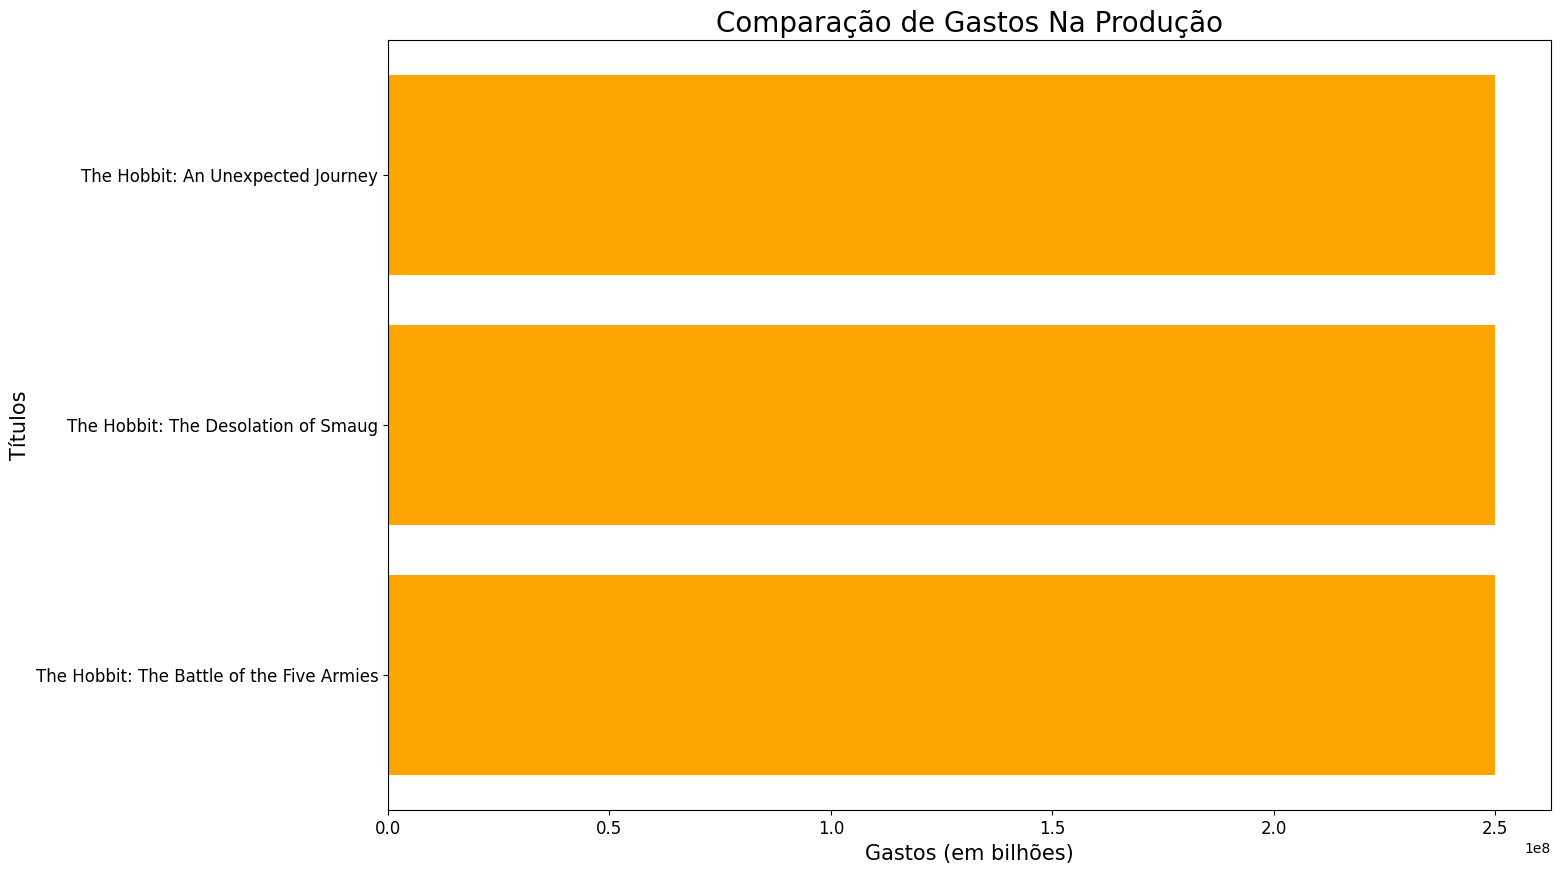

In [ ]:
# show a graph comparing the budget of each movie
plt.figure(figsize=(15, 10))
plt.barh([movie1, movie2, movie3], [budget1, budget2, budget3], color='orange')
plt.gca().invert_yaxis()
plt.title('Comparação de Gastos Na Produção', fontsize=20)
plt.xlabel('Gastos (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Hobbit ganhos sem contar com despesas ***

In [ ]:
# Get the revenue for each movie and print the title and corresponding revenue (without the budget calculated yet)
revenue1 = movies[movies['title'] == movie1]['revenue'].values[0]
revenue2 = movies[movies['title'] == movie2]['revenue'].values[0]
revenue3 = movies[movies['title'] == movie3]['revenue'].values[0]

revenueMIX = revenue1, revenue2, revenue3
caixaBudget = budget1, budget2, budget3

print(f"The movie '{movie1}' had a revenue of {revenue1} USD without counting the budget spent.")
print(f"The movie '{movie2}' had a revenue of {revenue2} USD without counting the budget spent.")
print(f"The movie '{movie3}' had a revenue of {revenue3} USD without counting the budget spent.")

# Calculate and print the total budget spent on The Hobbit trilogy
total_revenue = revenue1 + revenue2 + revenue3
print(f"The total budget spent on The Hobbit trilogy was: ${total_revenue} USD.")

The movie 'The Hobbit: An Unexpected Journey' had a revenue of 1021103568.0 USD without counting the budget spent.
The movie 'The Hobbit: The Desolation of Smaug' had a revenue of 958400000.0 USD without counting the budget spent.
The movie 'The Hobbit: The Battle of the Five Armies' had a revenue of 956019788.0 USD without counting the budget spent.
The total budget spent on The Hobbit trilogy was: $2935523356.0 USD.


## grafico de revenue (ganhos) = sem despesas incluidas (sem budget) **


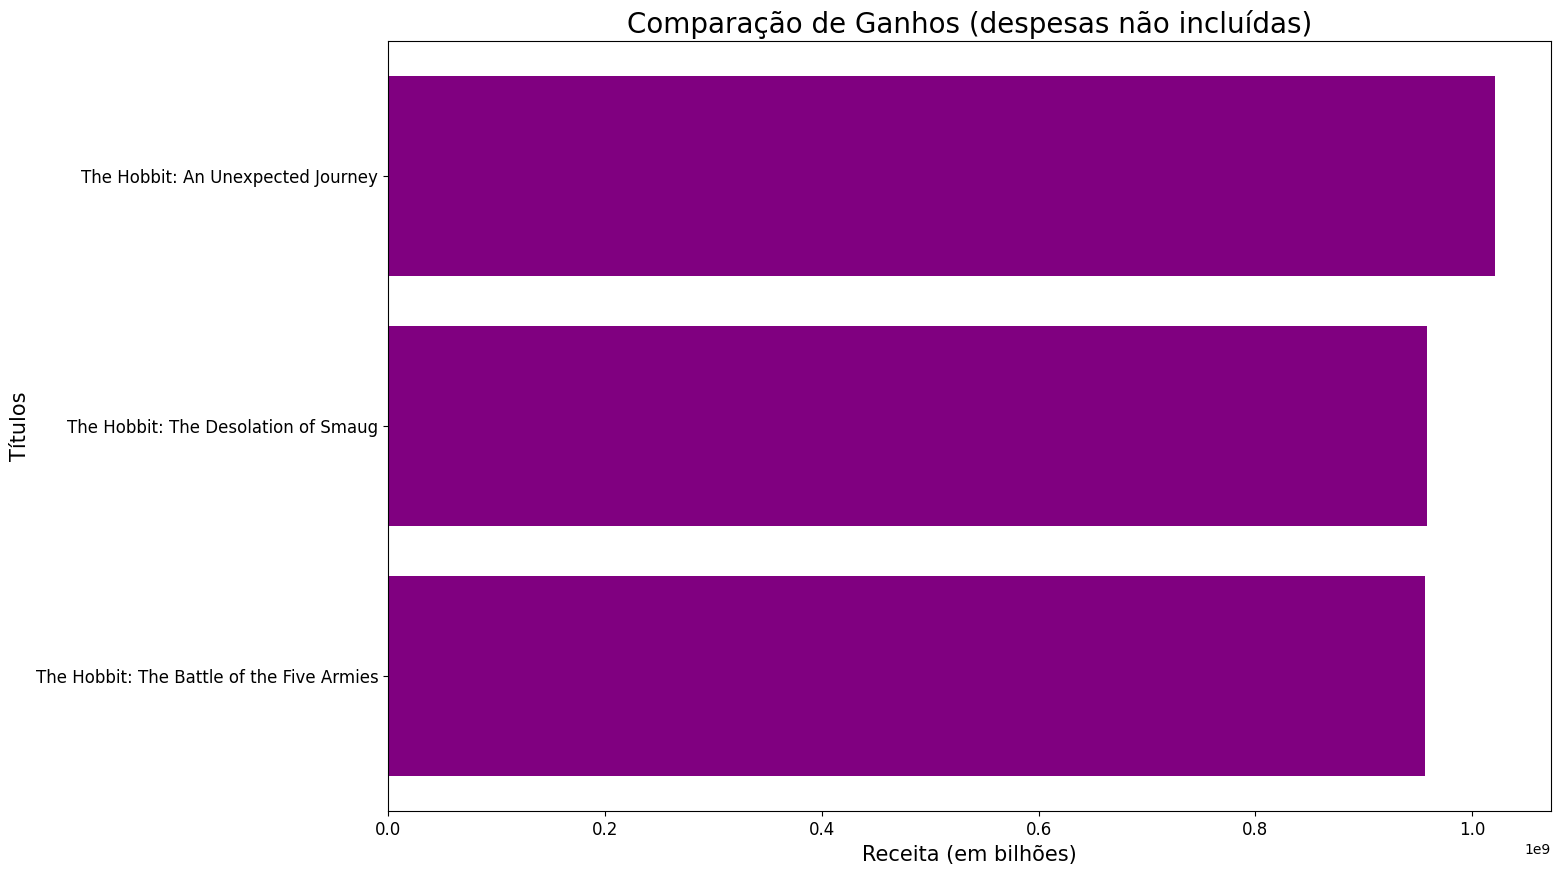

In [ ]:
plt.figure(figsize=(15, 10))
plt.barh([movie1, movie2, movie3], [revenue1, revenue2, revenue3], color='purple') # barh poe o grafico de barras na horizontal
plt.gca().invert_yaxis() # esta linha poe o grafico na horizontal
plt.title('Comparação de Ganhos (despesas não incluídas)', fontsize=20)
plt.xlabel('Receita (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## The hobbit PROFIT (lucros) **

In [ ]:
# Get the profit made for each movie and print the title and profit in descending order ************************
profit1 = movies[movies['title'] == movie1]['profit'].values[0]
profit2 = movies[movies['title'] == movie2]['profit'].values[0]
profit3 = movies[movies['title'] == movie3]['profit'].values[0]

print(f"The movie '{movie1}' made a profit of ${profit1} USD.")
print(f"The movie '{movie2}' made a profit of ${profit2} USD.")
print(f"The movie '{movie3}' made a profit of ${profit3} USD.")

# Calculate and print the total profit made by The Hobbit trilogy
total_profit = profit1 + profit2 + profit3
print(f"The total profit made by The Hobbit trilogy was: ${total_profit} USD.")

The movie 'The Hobbit: An Unexpected Journey' made a profit of $771103568.0 USD.
The movie 'The Hobbit: The Desolation of Smaug' made a profit of $708400000.0 USD.
The movie 'The Hobbit: The Battle of the Five Armies' made a profit of $706019788.0 USD.
The total profit made by The Hobbit trilogy was: $2185523356.0 USD.


grafico de profit (lucros)***

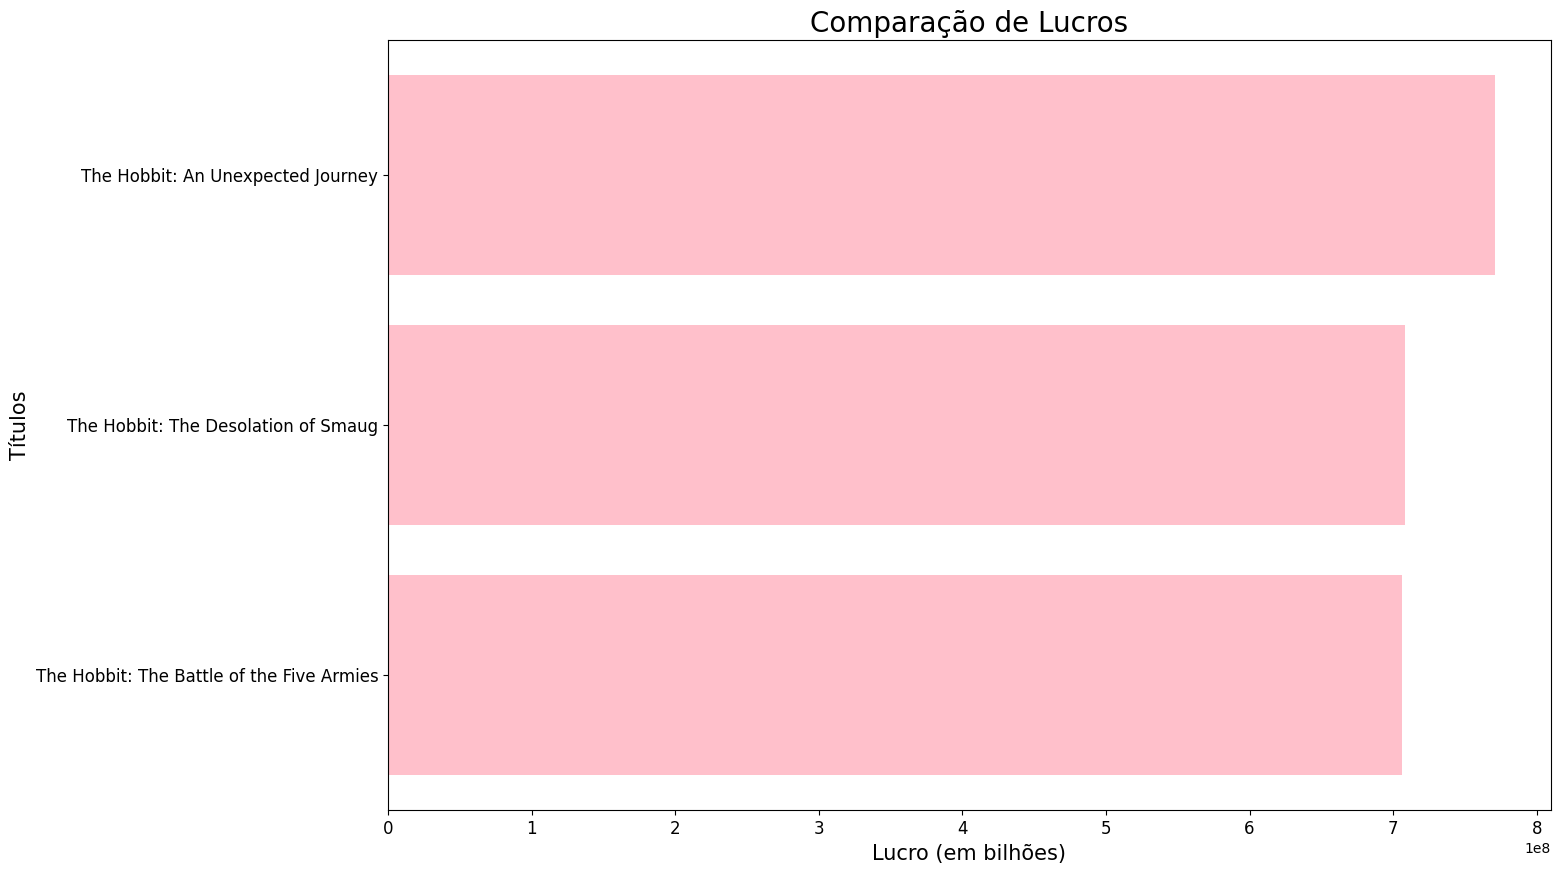

In [ ]:
#************************************************************************************
plt.figure(figsize=(15, 10))
plt.barh([movie1, movie2, movie3], [profit1, profit2, profit3], color='pink')
plt.gca().invert_yaxis()
plt.title('Comparação de Lucros', fontsize=20)
plt.xlabel('Lucro (em bilhões)', fontsize=15)
plt.ylabel('Títulos', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## inicio grafico comparacao ganhos (revenue) com despesas (budget) entre 2000 e 2018***

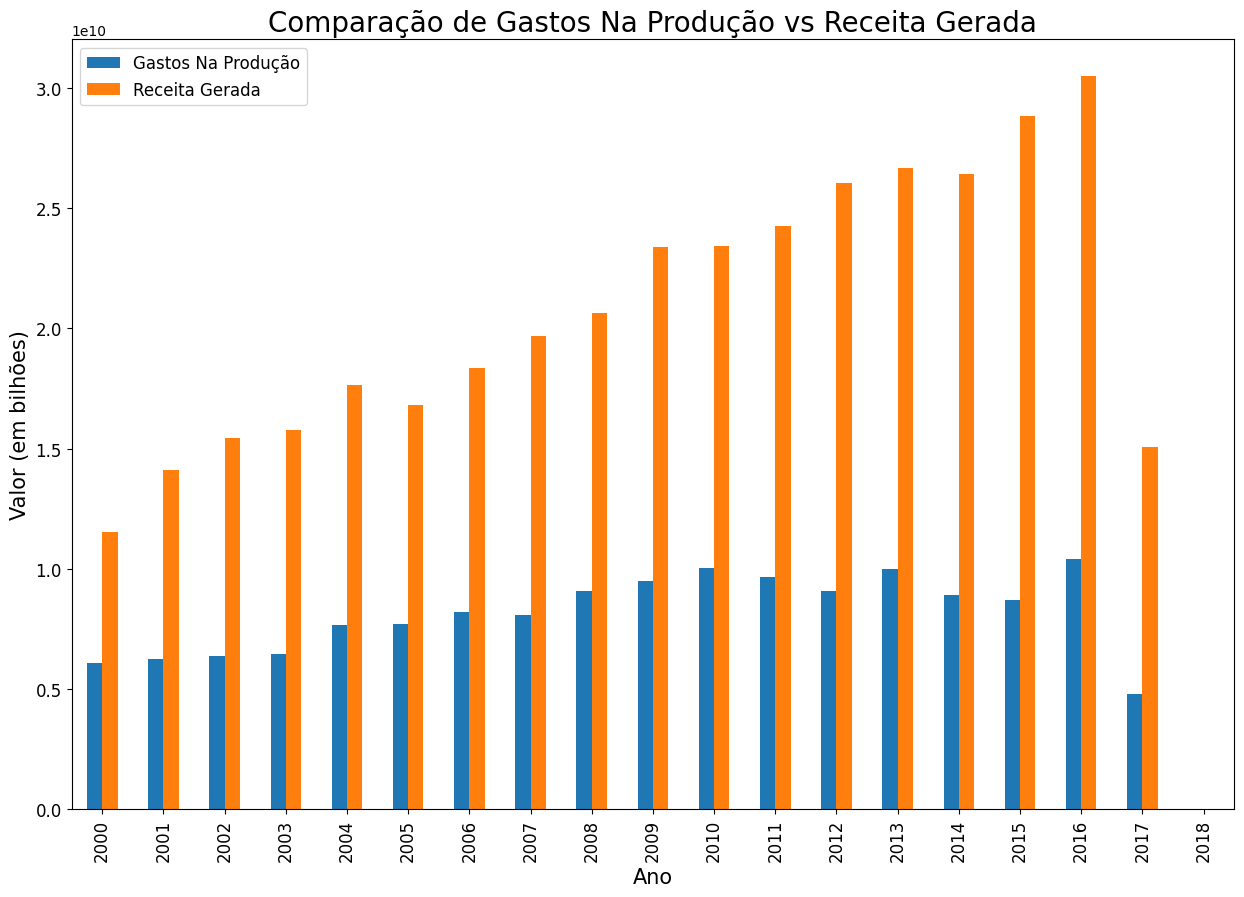

In [ ]:
# compare the budget spent vs the revenue generated from the movies between 2000 and 2018
movies_2000_2018 = movies[(movies['release_date'].dt.year >= 2000) & (movies['release_date'].dt.year <= 2018)]
# group the dataframe by year and sum the budget and revenue of each year
budget_revenue = movies_2000_2018.groupby(movies_2000_2018['release_date'].dt.year)[['budget', 'revenue']].sum()
# show a graph comparing the budget spent vs the revenue generated from the movies between 2000 and 2018
budget_revenue.plot(kind='bar', figsize=(15, 10))
plt.title('Comparação de Gastos Na Produção vs Receita Gerada', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Valor (em bilhões)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Gastos Na Produção', 'Receita Gerada'], fontsize=12)
plt.show()

** Que género de filme lucrou mais em 2014 ano?

In [ ]:
# check which genres had the highest profit in 2014
movies_2014 = movies[movies['release_date'].dt.year == 2014]
genres_profit_2014 = movies_2014[['genres', 'profit']]
genres_profit_2014['genre'] = genres_profit_2014['genres'].str[0].fillna('None')
genres_profit_2014.drop('genres', axis=1, inplace=True)
genres_profit_2014 = genres_profit_2014.groupby('genre')['profit'].sum().sort_values(ascending=False)
genres_profit_2014

<ipython-input-47-507d15b12026>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_profit_2014['genre'] = genres_profit_2014['genres'].str[0].fillna('None')
<ipython-input-47-507d15b12026>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_profit_2014.drop('genres', axis=1, inplace=True)


genre
Action             4.809746e+09
Science Fiction    2.413860e+09
Adventure          2.032072e+09
Comedy             1.565960e+09
Fantasy            1.267066e+09
Drama              1.004977e+09
Horror             7.160307e+08
War                7.053295e+08
Animation          6.376184e+08
Thriller           6.121422e+08
Romance            5.436533e+08
Family             5.394328e+08
Mystery            2.931815e+08
History            2.386371e+08
Crime              1.618383e+08
Music              1.135663e+07
Documentary        3.540245e+06
Foreign            0.000000e+00
TV Movie           0.000000e+00
N                 -3.899970e+05
Western           -1.890715e+07
Name: profit, dtype: float64

** qual foi o filme que teve mais lucros em 2016

In [ ]:
# Qual o filme que teve mais lucros em 2016?
movies_2016 = movies[movies['release_date'].dt.year == 2016]
most_profitable_2016 = movies_2016.nlargest(1, 'profit')
most_profitable_2016

,belongs_to_collection,budget,genres,original_title,release_date,revenue,runtime,title,production_companies_names,profit
movieId,,,,,,,,,,
271110,Captain America Collection,250000000.0,"[Adventure, Action, Science Fiction]",Captain America: Civil War,2016-04-27,1.153304e+09,147.0,Captain America: Civil War,"[Studio Babelsberg, Marvel Studios, Walt Disne...",903304495.0


*grafico numero de filmes produzidos por genero em 2017

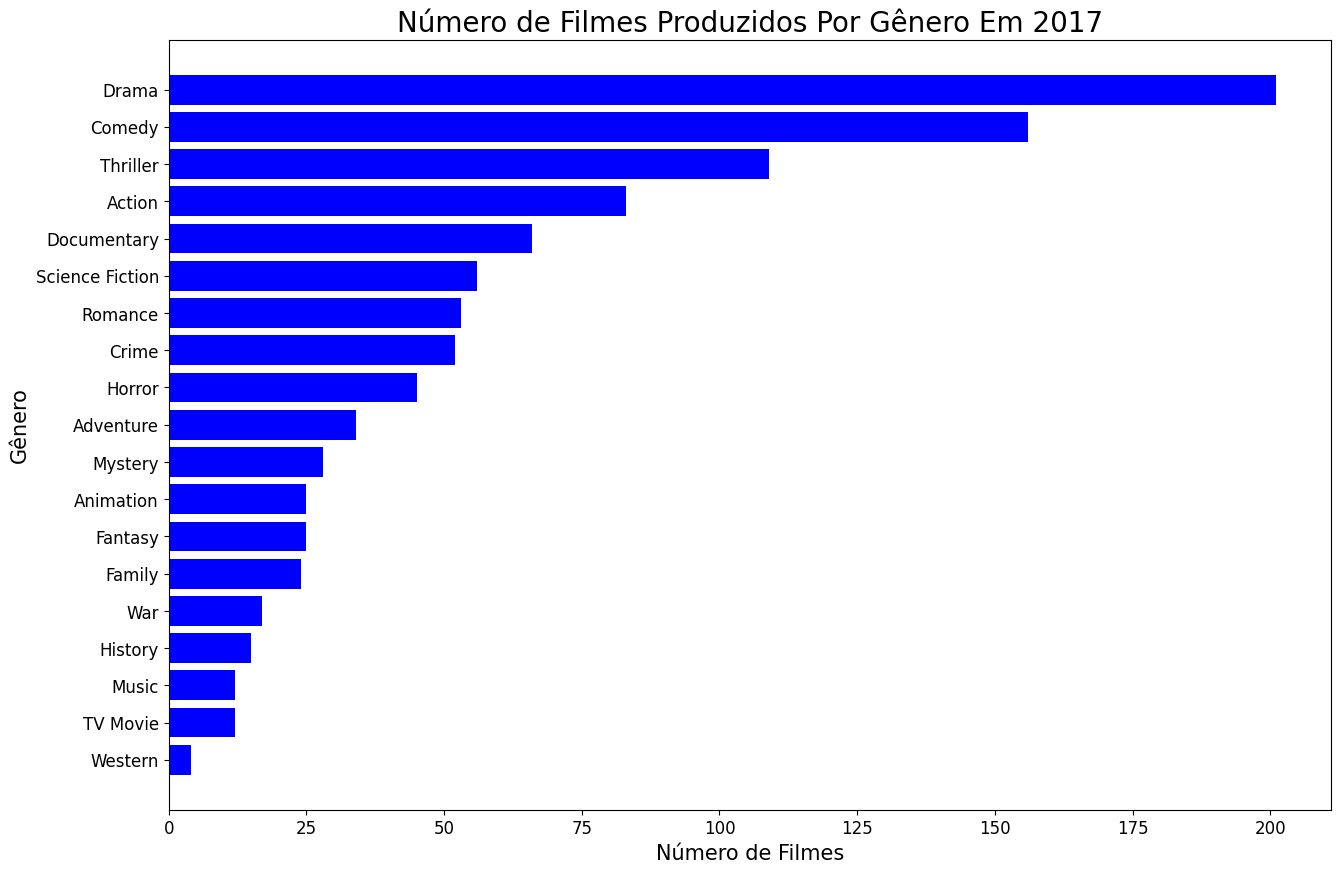

In [ ]:
# check which genre was produced the most movies in the year 2017
movies_2017 = movies[movies['release_date'].dt.year == 2017]
# create a list with all the genres from the movies released in 2017
genres_2017 = []
for genre in movies_2017['genres']:
    genres_2017.extend(genre)

# count the number of times each genre appears in the list
from collections import Counter
genre_count_2017 = Counter(genres_2017)
genre_count_2017

# create a DataFrame with the genres and their respective counts
genre_count_2017 = pd.DataFrame(genre_count_2017.items(), columns=['Genre', 'Count'])
# sort the DataFrame in descending order
genre_count_2017 = genre_count_2017.sort_values(by='Count', ascending=False)
genre_count_2017

# show a graph with the number of movies produced for each genre in 2017
plt.figure(figsize=(15, 10))
plt.barh(genre_count_2017['Genre'], genre_count_2017['Count'], color='blue')
plt.gca().invert_yaxis()
plt.title('Número de Filmes Produzidos Por Gênero Em 2017', fontsize=20)
plt.xlabel('Número de Filmes', fontsize=15)
plt.ylabel('Gênero', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*grafico lucro por genero

<ipython-input-50-cf74cf3039d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_profit['genre'] = genres_profit['genres'].str[0].fillna('None')
<ipython-input-50-cf74cf3039d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_profit.drop('genres', axis=1, inplace=True)


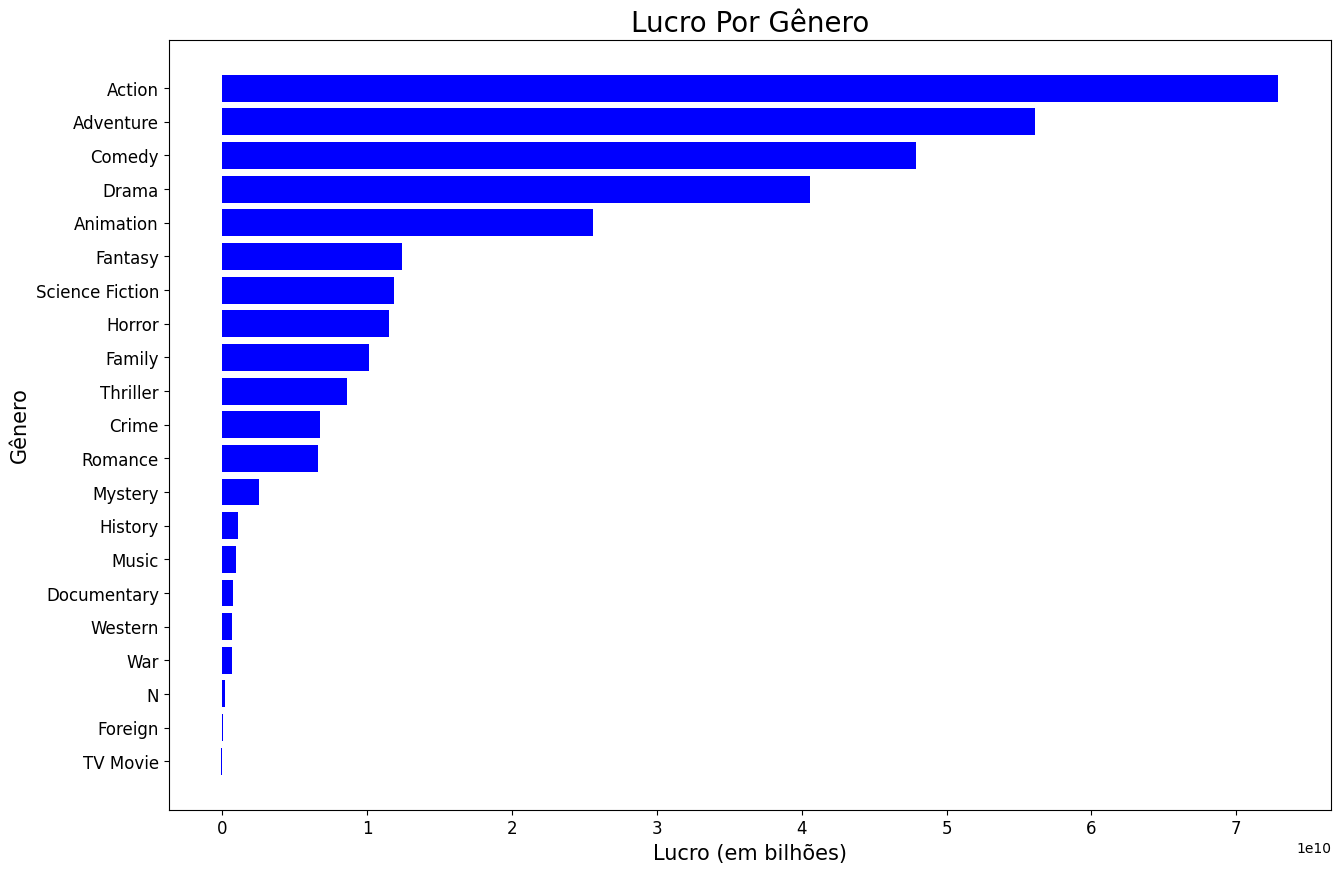

In [ ]:
# create a new dataframe with the genres and profit columns
genres_profit = movies[['genres', 'profit']]

# create a new column called genre that will contain the genres of each movie
genres_profit['genre'] = genres_profit['genres'].str[0].fillna('None')

# drop the genres column
genres_profit.drop('genres', axis=1, inplace=True)

# group the dataframe by genre and sum the profit of each genre
genres_profit = genres_profit.groupby('genre')['profit'].sum().sort_values(ascending=False)

# show a graph with the genres that had the highest profit
plt.figure(figsize=(15, 10))
plt.barh(genres_profit.index, genres_profit, color='blue')
plt.gca().invert_yaxis()
plt.title('Lucro Por Gênero', fontsize=20)
plt.xlabel('Lucro (em bilhões)', fontsize=15)
plt.ylabel('Gênero', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Quantos filmes foram produzidos pela Marvel até 2017?

In [ ]:
# create a new dataframe with the production_companies and release_date columns
production_companies = movies[['production_companies_names', 'release_date']]
# create a new column called company that will contain the production companies of each movie
production_companies['company'] = production_companies['production_companies_names'].str[0].fillna('None')
# drop the production_companies column
production_companies.drop('production_companies_names', axis=1, inplace=True)
# group the dataframe by company and count the number of movies produced by each company
company_count = production_companies.groupby('company')['release_date'].count().sort_values(ascending=False)
# show the number of movies produced by the Marvel company
company_count['Marvel Studios']

# print the number of movies produced by the Marvel company
print(f"A Marvel Studios produziu {company_count['Marvel Studios']} filmes até 2017.")

A Marvel Studios produziu 24 filmes até 2017.


<ipython-input-51-2f34245b8c60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_companies['company'] = production_companies['production_companies_names'].str[0].fillna('None')
<ipython-input-51-2f34245b8c60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  production_companies.drop('production_companies_names', axis=1, inplace=True)


# A FAZER:

*   Ver qual foi o genero que mais houve em x ano ✅ ❌
*   No Hobbit (trilogia), saber quanto custou ✅, quanto lucrou ✅ e comparar (gráfico) ✅ ⚡.
*   **NOTA: retificar a coluna budget, revenue e profit 5/6 unidades (para não aparecer o +)**

In [ ]:
# check if there is any movie with title titanic
# movies[movies['title'] == 'Titanic']

In [ ]:
movies.describe()

,budget,revenue,runtime,profit
count,4.177500e+04,4.177500e+04,41775.000000,4.177500e+04
mean,4.592167e+06,1.219384e+07,97.834279,7.601672e+06
std,1.812838e+07,6.701916e+07,33.750528,5.434796e+07
min,0.000000e+00,0.000000e+00,0.000000,-1.657101e+08
25%,0.000000e+00,0.000000e+00,87.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,95.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,108.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,1256.000000,2.550965e+09


## To use in the end and for testings

In [ ]:
movies.to_csv('cleaned_dataset.csv', index=False)